Dataset loaded: 211 training images, 53 validation images


c:\Users\MS\Downloads\School\2025\Cat\MyEnv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - accuracy: 0.3292 - loss: 1.1209 - val_accuracy: 0.3396 - val_loss: 1.0901
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.3798 - loss: 1.0976 - val_accuracy: 0.3774 - val_loss: 1.0863
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.3356 - loss: 1.0904 - val_accuracy: 0.3774 - val_loss: 1.0793
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.3882 - loss: 1.0770 - val_accuracy: 0.3774 - val_loss: 1.0633
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.4486 - loss: 1.0479 - val_accuracy: 0.4151 - val_loss: 1.0468
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.5818 - loss: 1.0069 - val_accuracy: 0.5283 - val_loss: 0.9973
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.4931 - loss: 0.9999 - val_accuracy: 0.4906 - val_loss: 0.9739
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - accuracy: 0.5541 - loss: 0.9158 - val_accuracy: 0.5660 - val_loss

c:\Users\MS\Downloads\School\2025\Cat\MyEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.3324 - loss: 1.1120 - val_accuracy: 0.3774 - val_loss: 1.0908
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.3786 - loss: 1.0995 - val_accuracy: 0.3774 - val_loss: 1.0871
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.3897 - loss: 1.0882 - val_accuracy: 0.3774 - val_loss: 1.0852
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.3801 - loss: 1.0903 - val_accuracy: 0.3774 - val_loss: 1.0887
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 843ms/step - accuracy: 0.3993 - loss: 1.0789 - val_accuracy: 0.3774 - val_loss: 1.1840
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.3987 - loss: 1.0952 - val_accuracy: 0.3208 - val_loss: 1.1329
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 0.4268 - loss: 1.0842 - val_accuracy: 0.3208 - val_loss: 1.1177
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.3915 - loss: 1.0943 - val_accuracy: 0.3208 - val_loss

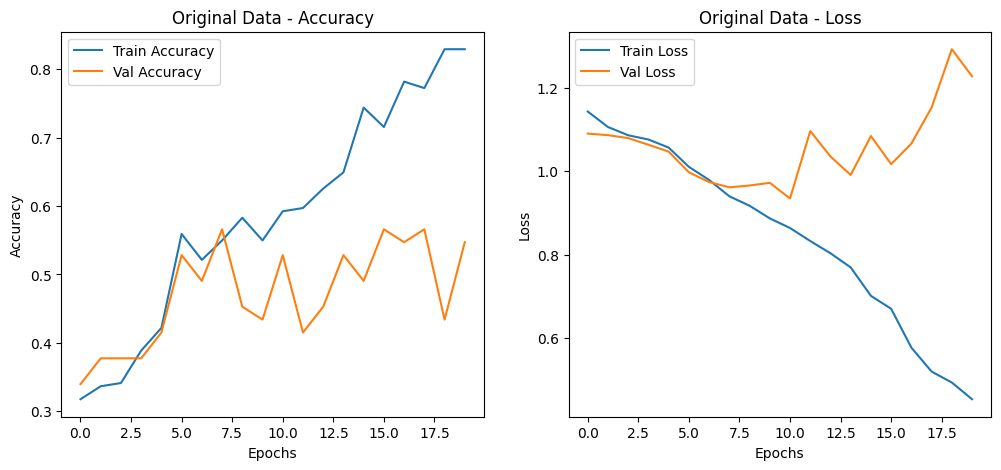

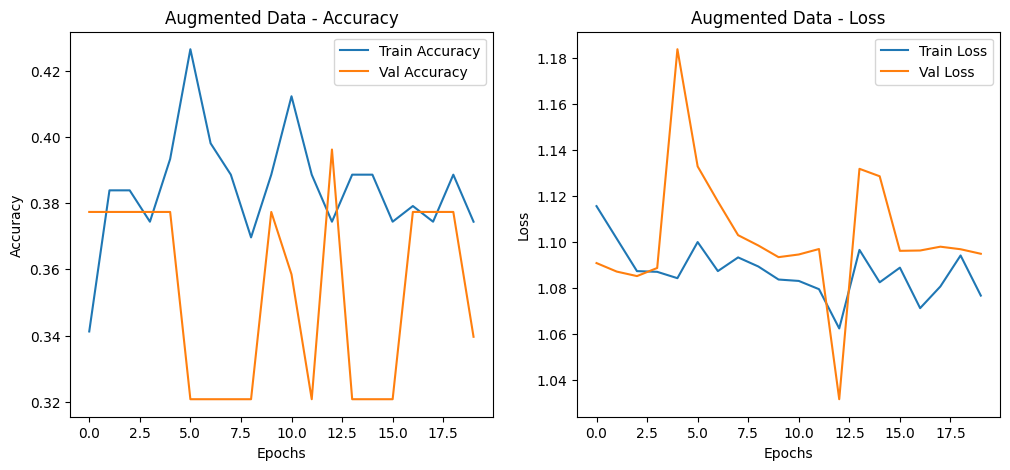

Final Validation Accuracy (Original Data): 0.5472
Final Validation Accuracy (Augmented Data): 0.3396
The model trained on original data performed better!


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Dataset path
DATASET_PATH = "Dataset"

# Emotion labels
emotion_labels = ['angry','happy','sad']

# Load images and labels
images, labels = [], []

for label_idx, label in enumerate(emotion_labels):
    folder_path = os.path.join(DATASET_PATH, label)
    if not os.path.exists(folder_path): 
        continue

    for image_file in os.listdir(folder_path):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, image_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (48, 48))  # Resize for CNN input
            images.append(img)
            labels.append(label_idx)  # Store label index

# Convert to NumPy arrays
images = np.array(images) / 255.0  # Normalize pixel values
labels = to_categorical(labels, num_classes=len(emotion_labels))  # One-hot encoding

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Dataset loaded: {len(X_train)} training images, {len(X_val)} validation images")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(emotion_labels), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Train the model on original dataset
cnn_original = build_cnn()

history_original = cnn_original.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Adjust based on performance
    batch_size=32,
    verbose=1
)
# Define augmentation transformations
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    zoom_range=0.2
)

# Augment training data
augmented_train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train the model on augmented dataset
cnn_augmented = build_cnn()

history_augmented = cnn_augmented.fit(
    augmented_train_generator,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)
# Plot function
def plot_training_results(history, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Accuracy
    ax[0].plot(history.history['accuracy'], label="Train Accuracy")
    ax[0].plot(history.history['val_accuracy'], label="Val Accuracy")
    ax[0].set_title(f"{title} - Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()
    
    # Loss
    ax[1].plot(history.history['loss'], label="Train Loss")
    ax[1].plot(history.history['val_loss'], label="Val Loss")
    ax[1].set_title(f"{title} - Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()
    
    plt.show()

# Compare results
plot_training_results(history_original, "Original Data")
plot_training_results(history_augmented, "Augmented Data")

# Get final accuracy for both models
final_acc_original = history_original.history['val_accuracy'][-1]
final_acc_augmented = history_augmented.history['val_accuracy'][-1]

print(f"Final Validation Accuracy (Original Data): {final_acc_original:.4f}")
print(f"Final Validation Accuracy (Augmented Data): {final_acc_augmented:.4f}")

if final_acc_augmented > final_acc_original:
    print("Augmentation improved the model's performance!")
else:
    print("The model trained on original data performed better!")